# Projet final du Kit Data Science 2021.
## Auteur: Mohamed FRIKHA


**ETAPES DE PROJET:**
- **I. Acquisition, chargement et Préparation des données:**
    1. Récupération des fichiers Excel avec les classements.
    2. Etablir une fonction de cleaning de data.
    3. Charger data set + Appliquer la fonction de cleaning + Afficher data.
    4. Récupération les données des caractéristiques techniques des voiliers.
    5. Cleaning données caractéritiques des voiliers.
    6. Rapprochement des données des voiliers avec celle des classements.
- **II. Traitement et analyses des données:**
    1. Corrélation et régression linéaire entre le classement (rang) et la vitesse utile (VMG) des voiliers.
    2. Impact de la présence d'un foil sur le classement et la vitesse des voiliers.
    3. Visualisation de la distance parcourue par voilier.
    4. Quelques visualisations et Analyse des données par Nationalité :
    5. Quelques visualisations et Analyse des données par Skipper:
- **III. nalyses de séries temporelles :**
    1. Visualiser la liste des skippers qui ont classé 1er minimuim une seule fois 
    2. Visualiser la liste des skippers qui ont abondoné :
-  **IV. Machine Learning :**
    1. Clustering sur les valeurs moyennes de VMG depuis 24 heures, présence de foils et la moyenne de rang :
    2. Clustering sur toutes les lignes des données de vitesse, VMG et distance (sans faire la moyenne des valeurs):
    3. Simple regression lineaire entre les valeurs moyennes de rang et VMG groupé par Crew
-  **V. Conclusion :**

# I - Acquisition, chargement et Préparation des données:

### 1 - Récupération des fichiers Excel avec les classements:

In [1]:
# scrapping la liste des fichiers à utiliser dans le projet:
import pandas as pd
import requests
from bs4 import BeautifulSoup
r = requests.get('https://www.vendeeglobe.org/fr/classement/20210305_080000')
soup = BeautifulSoup(r.content)
dates = []
for date_tag in soup.find('select', attrs={'class': 'form__input m--select onsubmit-rank'}).findAll('option'):
    dates.append(date_tag.attrs['value'])
dates[1:];
# Télécharger la liste:
# for date in dates[1:]:
#     var = requests.get('https://www.vendeeglobe.org/download-race-data/vendeeglobe_'+date+'.xlsx')
#     with open(f'D{date}.xlsx', 'wb') as f:
#         f.write(var.content)

### 2 -  Etablir une fonction de cleaning de data

In [2]:
# fonction de cleaning de liste
def data_cleaning(f):
    data = pd.read_excel(f,na_values=['-',''],header = [4])
# drop premier colonne (que des Nan dedans)
    data.drop(data.columns[[0]], axis=1, inplace=True)
# Renommer les colonnes 
    data = data.rename(columns={'Unnamed: 1':'Rang','Unnamed: 2':'Nat/Voile','Unnamed: 3':'Bateau/crew','Heure FR\nHour FR':'Heure FR','Latitude\nLatitude': 'Latitude', 'Longitude\nLongitude':'Longitude', 'Cap\nHeading':'Cap Heading(°) depuis 30mn','Vitesse\nSpeed':'Vitesse(kts) depuis 30mn','VMG\nVMG':'VMG(kts) depuis 30mn','Distance\nDistance':'Distance(nm) depuis 30 mn','Cap\nHeading.1':'Cap Heading(°) depuis le dernier classement','Vitesse\nSpeed.1':'Vitesse(kts) depuis le dernier classement','VMG\nVMG.1':'VMG(kts) depuis le dernier classement','Distance\nDistance.1':'Distance(nm) depuis le dernier classement','Cap\nHeading.2':'Cap Heading(°) depuis 24 heures','Vitesse\nSpeed.2':'Vitesse(kts) depuis 24 heures','VMG\nVMG.2':'VMG(kts) depuis 24 heures','Distance\nDistance.2':'Distance(nm) depuis 24 heures','Unnamed: 19':'DTF(nm)','Unnamed: 20':'DTL(nm)'})
# drop les Nan
    data = data.dropna()
# cleaning les lignes, changement de nom + types des donées et séparer les données en deux cases différentes si besoin    
#     data['Heure FR'] = data['Heure FR'].str.replace('FR\n', '')
    data['Nat/Voile'] = data['Nat/Voile'].str.replace('\n','')
    data['Bateau/crew'] = data['Bateau/crew'].str.replace('\n','/')
    data['Cap Heading(°) depuis le dernier classement'] = data['Cap Heading(°) depuis le dernier classement'].str.replace('°','').astype(int)
    data['Rang'] = data['Rang'].astype(int)

    data['Cap Heading(°) depuis 30mn'] = data['Cap Heading(°) depuis 30mn'].str.replace('°','').astype(int)
    data['Cap Heading(°) depuis 24 heures'] = data['Cap Heading(°) depuis 24 heures'].str.replace('°','').astype(int)
    data['Vitesse(kts) depuis le dernier classement'] = data['Vitesse(kts) depuis le dernier classement'].str.replace(' kts','').astype(float)
    data['Vitesse(kts) depuis 30mn'] = data['Vitesse(kts) depuis 30mn'].str.replace(' kts','').astype(float)
    data['Vitesse(kts) depuis 24 heures'] = data['Vitesse(kts) depuis 24 heures'].str.replace(' kts','').astype(float)
    data['VMG(kts) depuis le dernier classement'] = data['VMG(kts) depuis le dernier classement'].str.replace(' kts','').astype(float)
    data['VMG(kts) depuis 30mn'] = data['VMG(kts) depuis 30mn'].str.replace(' kts','').astype(float)
    data['VMG(kts) depuis 24 heures'] = data['VMG(kts) depuis 24 heures'].str.replace(' kts','').astype(float)
    data['Distance(nm) depuis le dernier classement'] = data['Distance(nm) depuis le dernier classement'].str.replace('nm','').astype(float)
    data['Distance(nm) depuis 30 mn'] = data['Distance(nm) depuis 30 mn'].str.replace('nm','').astype(float)
    data['Distance(nm) depuis 24 heures'] = data['Distance(nm) depuis 24 heures'].str.replace('nm','').astype(float)
    data['DTL(nm)'] = data['DTL(nm)'].str.replace('nm','').astype(float)
    data['DTF(nm)'] = data['DTF(nm)'].str.replace('nm','').astype(float)
    data[['Nationalité','Voile']] = data['Nat/Voile'].str.split(' ',expand = True)
    data[['Skipper','Crew']] = data['Bateau/crew'].str.split('/',expand = True)
#     # convertir le temps
    data['Heure FR'] = data['Heure FR'].apply(lambda x : str(x.split(' ')[0])).astype(str)
    data['Jour'] = f.split(".")[0].split("\\")[-1].split('_')[0]
    data["Temps"] = pd.to_datetime(data["Jour"]+data["Heure FR"].apply(lambda x : x[0:2]+x[3:5]), format='%Y%m%d%H%M')
# remplacer les FRAFA par FRA
    data.loc[data['Nationalité'].str.contains('FR'),'Nationalité'] = 'FRA' 
   
    data.drop(data.columns[[1,2]], axis=1, inplace=True)
# établir un ordre pour les colonnes
    data =data[['Temps','Rang','Nationalité', 'Voile', 'Skipper', 'Crew','Latitude','Longitude','Cap Heading(°) depuis 30mn','Vitesse(kts) depuis 30mn','VMG(kts) depuis 30mn','Distance(nm) depuis 30 mn','Cap Heading(°) depuis le dernier classement','Vitesse(kts) depuis le dernier classement','VMG(kts) depuis le dernier classement','Distance(nm) depuis le dernier classement','Cap Heading(°) depuis 24 heures','Vitesse(kts) depuis 24 heures','VMG(kts) depuis 24 heures','Distance(nm) depuis 24 heures','DTF(nm)','DTL(nm)']]
    return data

###  3 - Charger data set + Appliquer la fonction de cleaning + Afficher data :

In [3]:
# charger tous les fichiers + appliquer la fonction cleaning:
import glob

# get data file names
path =r'C:\Users\moham\OneDrive\Projet_kit_data_finale\excels'
filenames = glob.glob(path + "/*.xlsx")

df = pd.DataFrame()

for f in filenames:
    try:
        data = data_cleaning(f)
        df = df.append(data)
    except:
        pass
df

,Temps,Rang,Nationalité,Voile,Skipper,Crew,Latitude,Longitude,Cap Heading(°) depuis 30mn,Vitesse(kts) depuis 30mn,...,Cap Heading(°) depuis le dernier classement,Vitesse(kts) depuis le dernier classement,VMG(kts) depuis le dernier classement,Distance(nm) depuis le dernier classement,Cap Heading(°) depuis 24 heures,Vitesse(kts) depuis 24 heures,VMG(kts) depuis 24 heures,Distance(nm) depuis 24 heures,DTF(nm),DTL(nm)
0,2020-11-08 15:30:00,1,FRA,18,Louis Burton,Bureau Vallée 2,46°24.46'N,01°50.48'W,241,17.7,...,357,0.0,0.0,2788.0,201,0.3,0.3,6.1,24293.9,0.0
1,2020-11-08 15:31:00,2,MON,10,Boris Herrmann,Seaexplorer - Yacht Club De Monaco,46°24.34'N,01°49.82'W,241,11.1,...,357,0.0,0.0,2787.9,196,0.3,0.2,6.0,24294.2,0.4
2,2020-11-08 15:30:00,3,FRA,8,Jérémie Beyou,Charal,46°24.91'N,01°49.99'W,244,15.5,...,357,0.0,0.0,2788.5,199,0.2,0.2,5.5,24294.3,0.5
3,2020-11-08 15:30:00,4,FRA,59,Thomas Ruyant,LinkedOut,46°24.71'N,01°49.68'W,244,13.2,...,357,0.0,0.0,2788.3,196,0.2,0.2,5.6,24294.5,0.6
4,2020-11-08 15:30:00,5,FRA,53,Maxime Sorel,V And B Mayenne,46°24.59'N,01°49.56'W,246,10.9,...,357,0.0,0.0,2788.1,195,0.8,0.7,5.8,24294.5,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,2021-01-27 14:30:00,21,FRA,71,Manuel Cousin,Groupe Sétin,24°00.42'S,26°47.83'W,347,8.9,...,355,13.7,13.0,41.1,351,12.9,12.0,310.4,4521.7,4441.2
21,2021-01-27 14:30:00,22,FRA,50,Miranda Merron,Campagne de France,26°10.76'S,26°01.91'W,348,10.9,...,349,11.8,10.8,35.5,352,10.5,9.8,252.0,4639.1,4558.6
22,2021-01-27 14:30:00,23,FRA,83,Clément Giraud,Compagnie du lit - Jiliti,26°00.07'S,29°30.27'W,7,11.0,...,1,10.1,9.8,30.3,340,9.6,7.9,230.4,4674.6,4594.1
23,2021-01-27 14:30:00,24,FRA,72,Alexia Barrier,TSE - 4myplanet,48°09.05'S,53°51.45'W,25,10.1,...,23,9.1,9.0,27.3,29,11.4,11.4,273.7,6341.5,6260.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13703 entries, 0 to 24
Data columns (total 22 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   Temps                                        13703 non-null  datetime64[ns]
 1   Rang                                         13703 non-null  int32         
 2   Nationalité                                  13703 non-null  object        
 3   Voile                                        13703 non-null  object        
 4   Skipper                                      13703 non-null  object        
 5   Crew                                         13703 non-null  object        
 6   Latitude                                     13703 non-null  object        
 7   Longitude                                    13703 non-null  object        
 8   Cap Heading(°) depuis 30mn                   13703 non-null  int32         
 9 

### 4 - Récupération les données des caractéristiques techniques des voiliers: 

In [5]:
# scrapping data from website caractériqtiques des voiliers
r = requests.get('https://www.vendeeglobe.org/fr/glossaire')
soup = BeautifulSoup(r.content)
rows = []

for li_tag in soup.findAll('div', attrs={'class': 'boats-list__popup-infos'}):
    row = {}
    # title
    a = li_tag.find('h3', attrs={'class': 'boats-list__popup-title'})
    row['Crew'] = a.text.title().strip()
    
    
    Caractéristiques =[]
    for carac in li_tag.find('ul', attrs={'class': 'boats-list__popup-specs-list'}).findAll('li'):
        Caractéristiques.append(carac.text)
        
    
    
    for i in range(0,len(Caractéristiques)):
        row[Caractéristiques[i].split(":")[0].strip()] = Caractéristiques[i].split(":")[1].strip()
    
    rows.append(row) 
rows;
caractéristiques_technique = pd.DataFrame(rows)
# caractéristiques_technique.info()

### 5 - Cleaning données caractéritiques des voiliers

In [6]:
# cleaning data de caratéritiques technique de bateau
caractéristiques_technique['Longueur'] = caractéristiques_technique['Longueur'].str.replace('m', '').str.replace(',', '.').astype(float)
caractéristiques_technique['Largeur'] = caractéristiques_technique['Largeur'].str.replace(',', '.').str.replace('m','').astype(float)
caractéristiques_technique['Déplacement (poids)'] = caractéristiques_technique['Déplacement (poids)'].str.replace('tonnes','').str.replace('t','').str.replace(',', '.').str.replace('NC','Nan').str.replace('nc','Nan').astype(float)
caractéristiques_technique['Hauteur mât'] = caractéristiques_technique['Hauteur mât'].str.replace('m','').str.replace(',', '.').astype(float)
caractéristiques_technique['Tirant d\'eau'] = caractéristiques_technique['Tirant d\'eau'].str.replace('m','').str.replace(',', '.').astype(float)
caractéristiques_technique['Surface de voiles au près'] = caractéristiques_technique['Surface de voiles au près'].str.replace('m2','').str.replace('m²','').str.replace(',', '.').astype(float)
caractéristiques_technique['Surface de voiles au portant'] = caractéristiques_technique['Surface de voiles au portant'].str.replace('m2','').str.replace('m²','').str.replace(',', '.').astype(float)

In [7]:
caractéristiques_technique.head()


,Crew,Numéro de voile,Anciens noms du bateau,Architecte,Chantier,Date de lancement,Longueur,Largeur,Tirant d'eau,Déplacement (poids),Nombre de dérives,Hauteur mât,Voile quille,Surface de voiles au près,Surface de voiles au portant
0,Newrest - Art & Fenêtres,FRA 56,"No Way Back, Vento di Sardegna",VPLP/Verdier,Persico Marine,01 Août 2015,18.28,5.85,4.5,7.0,foils,29.0,monotype,320.0,570.0
1,Pure - Best Western®,FRA 49,"Gitana Eighty, Synerciel, Newrest-Matmut",Bruce Farr Design,Southern Ocean Marine (Nouvelle Zélande),08 Mars 2007,18.28,5.80,4.5,9.0,2,28.0,acier forgé,280.0,560.0
2,Tse - 4Myplanet,FRA72,"Famille Mary-Etamine du Lys, Initiatives Coeur...",Marc Lombard,MAG France,01 Mars 1998,18.28,5.54,4.5,9.0,2,29.0,acier,260.0,580.0
3,Maître Coq Iv,17,Safran 2 - Des Voiles et Vous,Verdier - VPLP,CDK Technologies,12 Mars 2015,18.28,5.80,4.5,8.0,foils,29.0,acier mécano soudé,310.0,550.0
4,Charal,08,NaN,VPLP,CDK Technologies,18 Août 2018,18.28,5.85,4.5,8.0,foils,29.0,acier,320.0,600.0


### 6 - Rapprochement des données des voiliers avec celle des classements :

In [8]:
caractéristiques_technique.groupby('Crew').size()

Crew
Apivia                                1
Arkea Paprec                          1
Banque Populaire X                    1
Bureau Vallee 2                       1
Campagne De France                    1
Charal                                1
Compagnie Du Lit / Jiliti             1
Corum L'Epargne                       1
Dmg Mori Global One                   1
Groupe Apicil                         1
Groupe Sétin                          1
Hugo Boss                             1
Initiatives-Coeur                     1
L'Occitane En Provence                1
La Fabrique                           1
La Mie Câline - Artisans Artipôle     1
Linkedout                             1
Macsf                                 1
Maître Coq Iv                         1
Medallia                              1
Merci                                 1
Newrest - Art & Fenêtres              1
Omia - Water Family                   1
One Planet One Ocean                  1
Prb                                

In [9]:
# Transformer colonne Crew en str title (usage de jointure )
df['Crew'] = df['Crew'].str.title()
df.groupby('Crew').size()

Crew
Apivia                                    481
Arkea Paprec                              158
Banque Populaire X                        482
Bureau Vallée 2                           482
Campagne De France                        482
Charal                                    482
Compagnie Du Lit - Jiliti                 482
Corum L'Épargne                            50
Dmg Mori Global One                       482
Groupe Apicil                             482
Groupe Sétin                              482
Hugo Boss                                 156
Initiatives - Coeur                       163
L'Occitane En Provence                    482
La Fabrique                               482
La Mie Câline - Artisans Artipôle         479
Linkedout                                 482
Macsf                                     376
Maître Coq Iv                             482
Medallia                                  482
Merci                                     417
Newrest - Art Et Fenetres    

In [10]:
df1 = pd.merge(df,
              caractéristiques_technique,
              left_on='Crew',
              right_on='Crew',
              how='left')
df1.head()

,Temps,Rang,Nationalité,Voile,Skipper,Crew,Latitude,Longitude,Cap Heading(°) depuis 30mn,Vitesse(kts) depuis 30mn,...,Date de lancement,Longueur,Largeur,Tirant d'eau,Déplacement (poids),Nombre de dérives,Hauteur mât,Voile quille,Surface de voiles au près,Surface de voiles au portant
0,2020-11-08 15:30:00,1,FRA,18,Louis Burton,Bureau Vallée 2,46°24.46'N,01°50.48'W,241,17.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-11-08 15:31:00,2,MON,10,Boris Herrmann,Seaexplorer - Yacht Club De Monaco,46°24.34'N,01°49.82'W,241,11.1,...,07 Août 2015,18.28,5.70,4.5,7.6,foils,29.0,acier,290.0,490.0
2,2020-11-08 15:30:00,3,FRA,8,Jérémie Beyou,Charal,46°24.91'N,01°49.99'W,244,15.5,...,18 Août 2018,18.28,5.85,4.5,8.0,foils,29.0,acier,320.0,600.0
3,2020-11-08 15:30:00,4,FRA,59,Thomas Ruyant,Linkedout,46°24.71'N,01°49.68'W,244,13.2,...,03 Septembre 2019,18.28,5.85,4.5,8.0,foils,29.0,acier forgé,350.0,560.0
4,2020-11-08 15:30:00,5,FRA,53,Maxime Sorel,V And B Mayenne,46°24.59'N,01°49.56'W,246,10.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## II - Traitement et analyses des données:

### 1 - Corrélation et régression linéaire entre le classement (rang) et la vitesse utile (VMG) des voiliers:
- On va regrouper les données par Crew
- Chercher une coorélation entre les Rang moyenne et les Vitesse VMG des voiliers
- Afficher les courbes pour montrer la regression lineaire

In [11]:
# regrouper les valeurs moyennes des données par Crew  
dt =df1.groupby('Crew').agg({'Rang': ['mean', 'count'],
                            'VMG(kts) depuis 30mn': 'mean',
                            'VMG(kts) depuis 24 heures': 'mean',
                            'VMG(kts) depuis le dernier classement': 'mean',
                            'Distance(nm) depuis 30 mn': 'mean',
                            'Distance(nm) depuis 24 heures': 'mean',
                            'Distance(nm) depuis le dernier classement': 'mean'})
dt.columns= ['Rang moyenne','Nombre de Rang','VMG Moyenne depuis 30mn','VMG Moyenne depuis 24 heures','VMG Moyenne depuis le dernier classement','Distance(nm) Moyenne depuis 30mn','Distance(nm) Moyenne depuis 24 heures','Distance(nm) Moyenne depuis le dernier classement']
# afin de rapprocher et avoir une meilleure idée sur la correlation entre VMG et Rang on va éliminer les Crew qui ont moins de 400 classements
dt= dt.loc[dt['Nombre de Rang']>=400]
dt.head()


,Rang moyenne,Nombre de Rang,VMG Moyenne depuis 30mn,VMG Moyenne depuis 24 heures,VMG Moyenne depuis le dernier classement,Distance(nm) Moyenne depuis 30mn,Distance(nm) Moyenne depuis 24 heures,Distance(nm) Moyenne depuis le dernier classement
Crew,,,,,,,,
Apivia,2.286902,481,12.687734,12.604990,12.773597,7.548441,331.893971,64.219958
Banque Populaire X,13.636929,482,11.961411,11.770539,11.933195,6.665145,304.438797,57.902905
Bureau Vallée 2,6.819502,482,12.721369,12.571577,12.833402,7.409751,330.461411,63.375311
Campagne De France,23.852697,482,10.237137,10.111618,10.215353,5.798548,264.960373,51.186307
Charal,22.369295,482,11.268880,11.132365,11.315768,6.882158,307.926349,59.440041


Le score du modéle lineaire de VMG enf fonction de Rang est : 0.8353694754576615


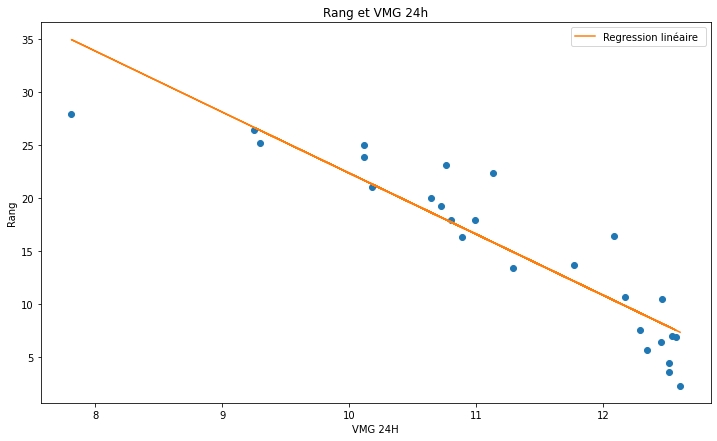

In [12]:
from sklearn.linear_model import LinearRegression
X_24h = dt[['VMG Moyenne depuis 24 heures']] #X_24h pour les VMG de 24h
y = dt['Rang moyenne']
reg = LinearRegression().fit(X_24h, y)
# teste rapide de score de  regression linéaire
print(f'Le score du modéle lineaire de VMG enf fonction de Rang est : {reg.score(X_24h,y)}')
a = reg.coef_
b = reg.intercept_
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
fig, ax = plt.subplots(figsize=(12,7))
ax.plot(X_24h,y,'o')
ax.set(title='Rang et VMG 24h',
      xlabel='VMG 24H',
      ylabel ='Rang');
ax.plot(X_24h, a * X_24h +b, label = 'Regression linéaire ')
ax.legend()
plt.show()

Le score du modéle lineaire de VMG enf fonction de Rang est : 0.818984193575091


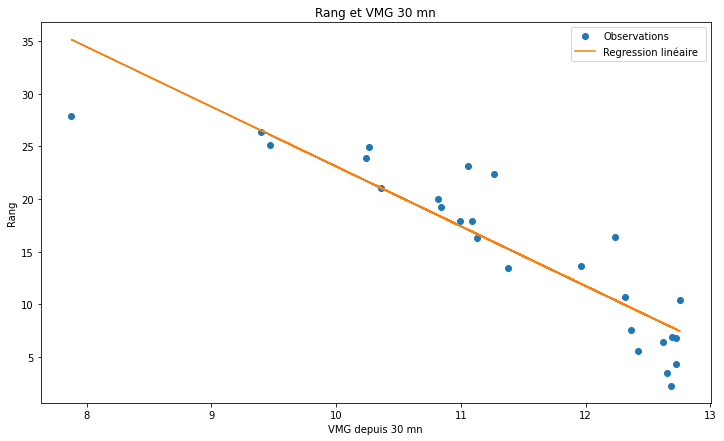

In [13]:
X_30mn = dt[['VMG Moyenne depuis 30mn']] #X_30mn pour les VMG depuis 30 mn
y = dt['Rang moyenne']
reg = LinearRegression().fit(X_30mn, y)
# test de score de  regression linéaire
print(f'Le score du modéle lineaire de VMG enf fonction de Rang est : {reg.score(X_30mn,y)}')
a1 = reg.coef_
b1 = reg.intercept_
fig, ax = plt.subplots(figsize=(12,7))
ax.plot(X_30mn,y,'o', label = 'Observations')
ax.set(title='Rang et VMG 30 mn',
      xlabel='VMG depuis 30 mn',
      ylabel ='Rang');
ax.plot(X_30mn, a1 * X_30mn +b1, label = 'Regression linéaire ')
ax.legend()
plt.show()

Le score du modéle lineaire de VMG enf fonction de Rang est : 0.8339795989146169


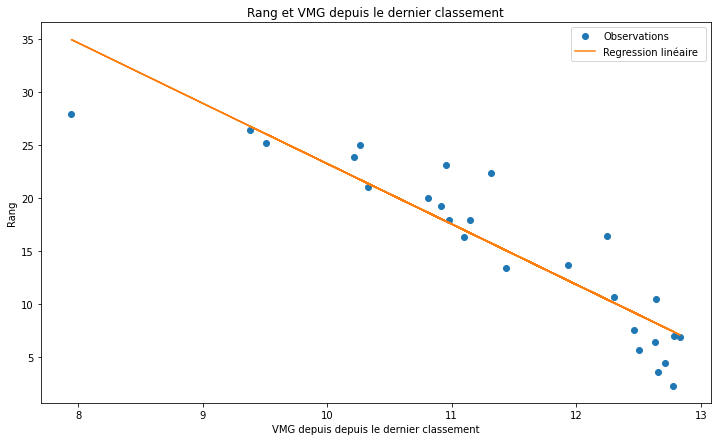

In [14]:
X_last = dt[['VMG Moyenne depuis le dernier classement']] #X_last pour les VMG de 24h
y = dt['Rang moyenne']
reg = LinearRegression().fit(X_last, y)
# teste rapide de score de  regression linéaire
print(f'Le score du modéle lineaire de VMG enf fonction de Rang est : {reg.score(X_last,y)}')
a2 = reg.coef_
b2 = reg.intercept_
fig, ax = plt.subplots(figsize=(12,7))
ax.plot(X_last,y,'o', label = 'Observations')
ax.set(title='Rang et VMG depuis le dernier classement',
      xlabel='VMG depuis depuis le dernier classement',
      ylabel ='Rang');
ax.plot(X_last, a2 * X_last +b2, label = 'Regression linéaire ')
ax.legend()
plt.show()

**Conclusion:** On a un score R² forte entre 0.80 et 0.83. Plus le R² tend vers 1, plus le nuage de points se resserre autour de la droite de régression.dans les trois cas de vitesse VMG (depuis 24h,le dernier classement, depuis 30mn) R² > 0.80 est trés proche de 1 cela signifie que les équations de la droite de régression sont capables de déterminer 80 % de la distribution des points.d 'ou la forte corrélation entre VMG(depuis 24h,depuis 30 et depuis le dernier classement) et la moyenne de RANG

### 2 - Impact de la présence d'un foil sur le classement et la vitesse des voiliers:

Pour cette analyse on va prendre les top 10 de classement moyen et on va regrouper le dataset par OUI présence de voile ou NON présence de voile:

In [15]:
df1['Nombre de dérives'].value_counts()

foils             5967
2                 3791
2 asymétriques     482
foiler             158
Name: Nombre de dérives, dtype: int64

On va classifier OUI présence de foils pour les voiliers qui ont un minimuim un foils et NON pour ceux qui ont un Nan ou 0 foils et on prends seulement les 10 Crew classés moyennement en premier:

In [16]:
dt3 =df1.groupby('Crew').agg({'Rang': ['mean', 'count'],
                            'VMG(kts) depuis 30mn': 'mean',
                            'VMG(kts) depuis 24 heures': 'mean',
                            'VMG(kts) depuis le dernier classement': 'mean',
                            'Nombre de dérives':'max'})
dt3.columns= ['Rang moyenne','Nombre de Rang','VMG Moyenne depuis 30mn','VMG Moyenne depuis 24 heures','VMG Moyenne depuis le dernier classement','Présence de foils']
dt3['Présence de foils'] = dt3['Présence de foils'].str.replace('foils','OUI').str.replace('foiler','OUI').str.replace('2 asymétriques','OUI').str.replace('2','OUI')
dt3['Présence de foils'].fillna('NON',inplace = True)
# prendre les top 10 afin de savoir les vrai impactes sur la présence ou non présence de foils sur le classement.
dt3= dt3.loc[dt3['Rang moyenne']<=10]


In [17]:
dt3['Présence de foils'].value_counts()

OUI    8
NON    3
Name: Présence de foils, dtype: int64

In [18]:
dt3.head()

,Rang moyenne,Nombre de Rang,VMG Moyenne depuis 30mn,VMG Moyenne depuis 24 heures,VMG Moyenne depuis le dernier classement,Présence de foils
Crew,,,,,,
Apivia,2.286902,481,12.687734,12.604990,12.773597,OUI
Bureau Vallée 2,6.819502,482,12.721369,12.571577,12.833402,NON
Corum L'Épargne,7.260000,50,9.970000,9.376000,9.888000,NON
Groupe Apicil,6.383817,482,12.615768,12.457054,12.628838,OUI
Hugo Boss,7.461538,156,11.041026,10.966667,11.120513,OUI


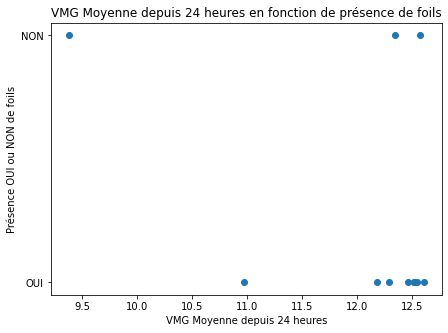

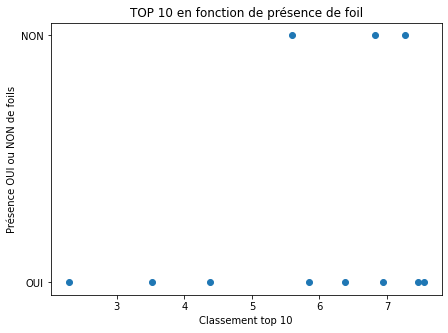

In [19]:
fig4, ax4 = plt.subplots(figsize=(7,5))
fig3, ax3 = plt.subplots(figsize=(7,5))
ax3.plot(dt3['Rang moyenne'] ,dt3['Présence de foils'],'o')
ax4.plot(dt3['VMG Moyenne depuis 24 heures'] ,dt3['Présence de foils'],'o')
ax3.set(title='TOP 10 en fonction de présence de foil',
      xlabel='Classement top 10',
      ylabel ='Présence OUI ou NON de foils');
ax4.set(title='VMG Moyenne depuis 24 heures en fonction de présence de foils',
      xlabel='VMG Moyenne depuis 24 heures',
      ylabel ='Présence OUI ou NON de foils')
plt.show()

**Remarque :** la moyenne maximale de classement est 27, on a pris les 10 premiers classement pour savoir l'impacte de présences de foils dans les voiliers dans le top 10.

**Conclustion :** La présence de foils a un impact sur la vitesse et la moyenne de rang des voiliers. parmi les top 10 de classement ou top 10 VMG on a 8 voiliers ont un ou plusieurs foils contre 3 voiliers qui n'ont pas de foil.

### 3 - Visualisation de la distance parcourue par Crew:

In [20]:
dt.head()

,Rang moyenne,Nombre de Rang,VMG Moyenne depuis 30mn,VMG Moyenne depuis 24 heures,VMG Moyenne depuis le dernier classement,Distance(nm) Moyenne depuis 30mn,Distance(nm) Moyenne depuis 24 heures,Distance(nm) Moyenne depuis le dernier classement
Crew,,,,,,,,
Apivia,2.286902,481,12.687734,12.604990,12.773597,7.548441,331.893971,64.219958
Banque Populaire X,13.636929,482,11.961411,11.770539,11.933195,6.665145,304.438797,57.902905
Bureau Vallée 2,6.819502,482,12.721369,12.571577,12.833402,7.409751,330.461411,63.375311
Campagne De France,23.852697,482,10.237137,10.111618,10.215353,5.798548,264.960373,51.186307
Charal,22.369295,482,11.268880,11.132365,11.315768,6.882158,307.926349,59.440041


**Distance moyenne :**

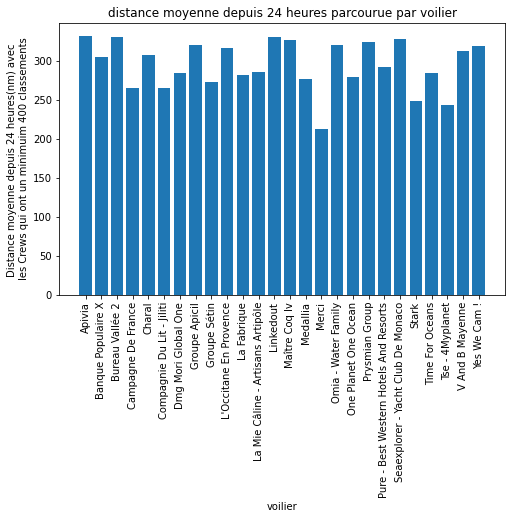

In [21]:
fig, ax = plt.subplots(figsize=(8,5))
ax.bar(x = dt.index ,height=dt['Distance(nm) Moyenne depuis 24 heures'])
ax.set(title='distance moyenne depuis 24 heures parcourue par voilier',
      xlabel='voilier',
      ylabel ='Distance moyenne depuis 24 heures(nm) avec \nles Crews qui ont un minimuim 400 classements');
plt.xticks(rotation=90);
plt.show()

**Distances totales :**

In [22]:
dt2 =df1.groupby('Crew').agg({'Rang': ['mean', 'count'],
                            'VMG(kts) depuis 30mn': 'mean',
                            'VMG(kts) depuis 24 heures': 'mean',
                            'VMG(kts) depuis le dernier classement': 'mean',
                            'Distance(nm) depuis 30 mn': 'sum',
                            'Distance(nm) depuis 24 heures': 'sum',
                            'Distance(nm) depuis le dernier classement': 'sum'})
dt2.columns= ['Rang moyenne','Nombre de Rang','VMG sum depuis 30mn','VMG sum depuis 24 heures','VMG sum depuis le dernier classement','Distance(nm) sum depuis 30mn','Distance(nm) sum depuis 24 heures','Distance(nm) sum depuis le dernier classement']
dt2.head()

,Rang moyenne,Nombre de Rang,VMG sum depuis 30mn,VMG sum depuis 24 heures,VMG sum depuis le dernier classement,Distance(nm) sum depuis 30mn,Distance(nm) sum depuis 24 heures,Distance(nm) sum depuis le dernier classement
Crew,,,,,,,,
Apivia,2.286902,481,12.687734,12.604990,12.773597,3630.8,159641.0,30889.8
Arkea Paprec,10.398734,158,11.467089,11.296835,11.474684,1115.5,49758.1,11478.6
Banque Populaire X,13.636929,482,11.961411,11.770539,11.933195,3212.6,146739.5,27909.2
Bureau Vallée 2,6.819502,482,12.721369,12.571577,12.833402,3571.5,159282.4,30546.9
Campagne De France,23.852697,482,10.237137,10.111618,10.215353,2794.9,127710.9,24671.8


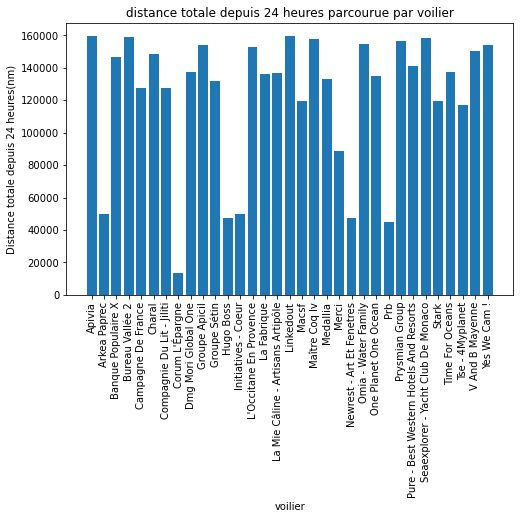

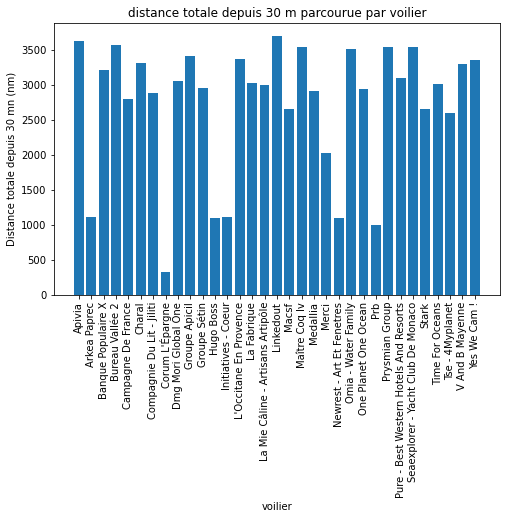

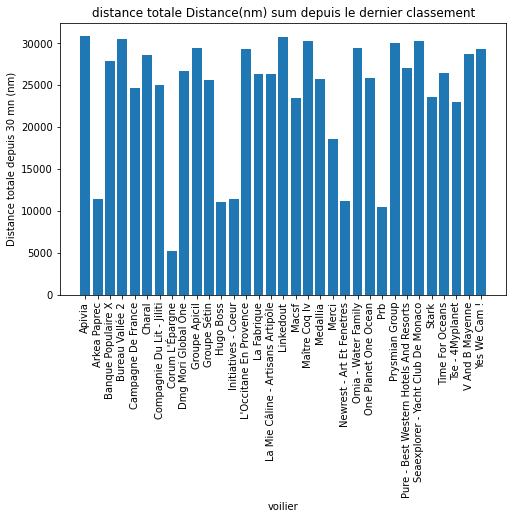

In [23]:
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
fig1, ax1 = plt.subplots(figsize=(8,5))
fig2, ax2 = plt.subplots(figsize=(8,5))
fig3, ax3 = plt.subplots(figsize=(8,5))
ax1.bar(x = dt2.index ,height=dt2['Distance(nm) sum depuis 24 heures'])
ax1.set(title='distance totale depuis 24 heures parcourue par voilier',
      xlabel='voilier',
      ylabel ='Distance totale depuis 24 heures(nm)');

# plot distance totale depuis 30 m parcourue par voilier
ax2.bar(x = dt2.index ,height=dt2['Distance(nm) sum depuis 30mn'])
ax2.set(title='distance totale depuis 30 m parcourue par voilier',
      xlabel='voilier',
      ylabel ='Distance totale depuis 30 mn (nm)');

ax3.bar(x = dt2.index ,height=dt2['Distance(nm) sum depuis le dernier classement'])
ax3.set(title='distance totale Distance(nm) sum depuis le dernier classement',
      xlabel='voilier',
      ylabel ='Distance totale depuis 30 mn (nm)');
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=90);
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=90);
plt.setp(ax3.xaxis.get_majorticklabels(), rotation=90);

plt.show()

### 4 - Quelques visualisations et Analyse des données par Nationalité :

In [24]:
dt4 = df.groupby('Nationalité').agg({'Rang': ['mean','max','min'],
                            'VMG(kts) depuis 30mn': 'max',
                            'VMG(kts) depuis 24 heures': 'max',
                            'VMG(kts) depuis le dernier classement': 'max',
                            'Distance(nm) depuis 30 mn': 'max',
                            'Distance(nm) depuis 24 heures': 'max',
                            'Distance(nm) depuis le dernier classement': 'max'
                              })
dt4.columns= ['Rang moyenne','Max Rang','Min Rang','VMG max depuis 30mn','VMG max depuis 24 heures','VMG max depuis le dernier classement','Distance(nm) max depuis 30mn','Distance(nm) max depuis 24 heures','Distance(nm) max depuis le dernier classement']
dt4

,Rang moyenne,Max Rang,Min Rang,VMG max depuis 30mn,VMG max depuis 24 heures,VMG max depuis le dernier classement,Distance(nm) max depuis 30mn,Distance(nm) max depuis 24 heures,Distance(nm) max depuis le dernier classement
Nationalité,,,,,,,,,
ESP,19.993776,27,11,18.5,17.0,18.6,9.6,412.1,2789.1
FIN,26.390041,32,22,17.5,14.5,17.0,9.0,351.1,2789.1
FRA,14.081392,33,1,24.1,21.3,23.3,32.5,515.3,2795.5
GBR,16.349530,30,1,23.6,20.6,22.0,26.3,501.8,2788.8
ITA,10.454357,28,6,21.7,18.8,21.0,11.3,459.1,2789.1
JPN,23.136929,32,10,20.6,18.5,19.9,11.0,457.3,2788.9
MON,6.939834,29,2,22.1,18.8,20.6,12.0,464.5,2787.9
SUI,16.340249,28,14,20.6,17.8,19.6,10.3,446.5,2789.2


**Vision globale :**

Simple overlook ou une vue globale sur notre jeux de données groupé par Nationalité : on peut rien tenir comme on peut s'orienter dans notre analyse prochainement ou avoir une idée  sur les différentes relations entre les variables :

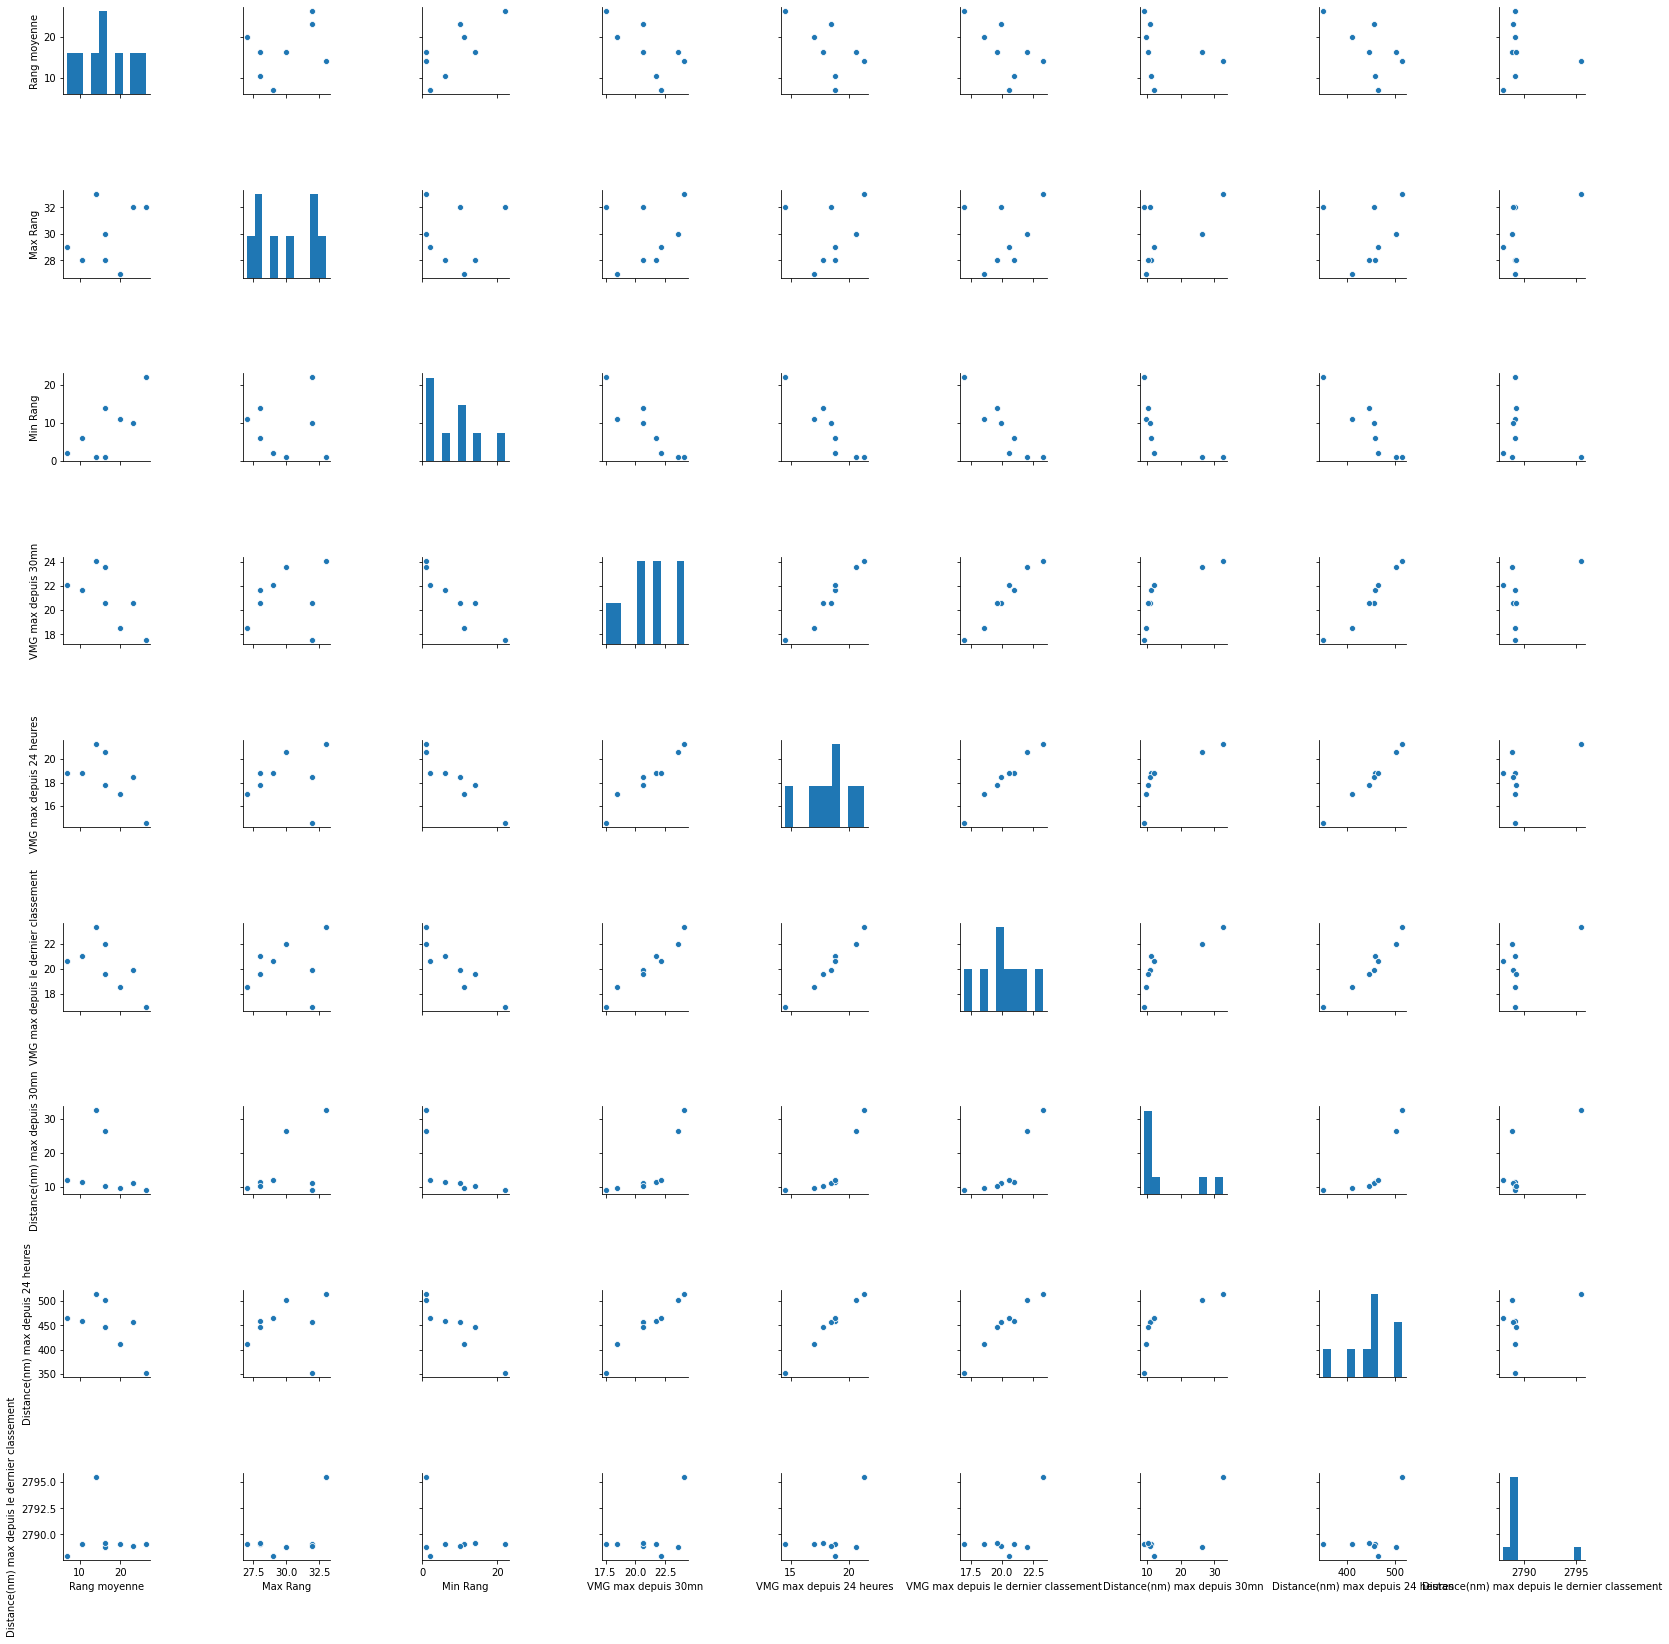

In [25]:
import seaborn as sns
ax = sns.pairplot(dt4);


**Une idée globale:** on voit bien les regressions lineaires qu'on a déja étudié entre vitesse VMG et rang moyennes. on peut aller plus loin, on voit bien une relation entre vitesse, VMG et distance (quelques que soit 30mn,24h ou depuis le dernier classement) avec les rangs (rang moyenne, rang maxi ou rang mini) 

**Nombre de voiles par nationalité sur le jeu de données**

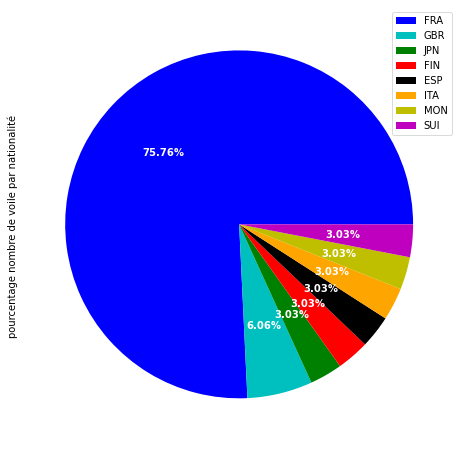

In [26]:
dt6 = df.groupby('Voile').agg({
                              'Nationalité':'max'})
dt6.columns= ['Nationalité']
dt6
dt6_nat = pd.DataFrame(dt6['Nationalité'].value_counts())
dt6_nat.plot(kind='pie',
         y= 'Nationalité',
         colors=['b', 'c','g','r','black','orange','y','m'],
         autopct='%1.2f%%',
         textprops={'color': 'w', 'weight': 'bold'},label = 'pourcentage nombre de voile par nationalité ',figsize=(12, 8));
plt.legend(framealpha=0.7, frameon=True,loc = 'upper right')


**Remarque** : d'aprés la figure ci-dessus, les français ont participé plus de 3/4 des participants. environs 75% parmi les totales voiliers. forte participation par rapport les autres participants.

**Relation entre Nationalité et classemment (moyen, maximuim et minimuim):**

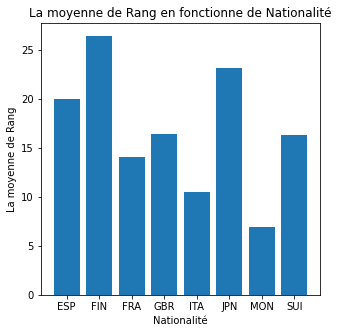

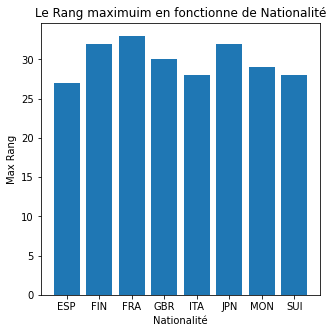

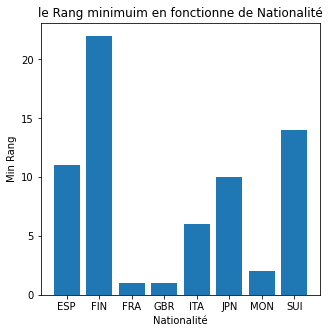

In [27]:
fig1, ax1 = plt.subplots(figsize=(5,5))
fig2, ax2 = plt.subplots(figsize=(5,5))
fig3, ax3 = plt.subplots(figsize=(5,5))
ax1.bar(x = dt4.index,height= dt4['Rang moyenne'],);
ax2.bar(x = dt4.index,height= dt4['Max Rang'] );
ax3.bar(x = dt4.index,height= dt4['Min Rang'] );
ax1.set(title='La moyenne de Rang en fonctionne de Nationalité',
      xlabel='Nationalité',
      ylabel ='La moyenne de Rang');
ax2.set(title='Le Rang maximuim en fonctionne de Nationalité',
      xlabel='Nationalité',
      ylabel ='Max Rang');
ax3.set(title='le Rang minimuim en fonctionne de Nationalité',
      xlabel='Nationalité',
      ylabel ='Min Rang');

**Remarque :** 
- Dans l'histogramme de rang minimuim en fonction de nationalité, on remarque que les français et les angais ont les premiers classments, ils ont étaient classés minimuim une fois les premiers.
- Dans l'histogramme de moyenne de rang et rang maximuim, on trouve bien aussi les français, ceux ci est peut être expliqué du fait qu'il ya 75% des français dans le race que forcément qu'ont aura des premiers et des derniers, on peut dire que dans cette dataset l'étude par Nationalité peut engendrer une sorte de perte de précision à cause du non équilibre entre le nombre des français qui ont participé 75% et les autres 3-6%.

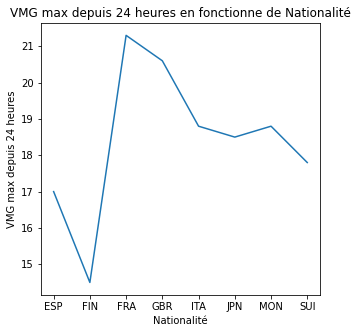

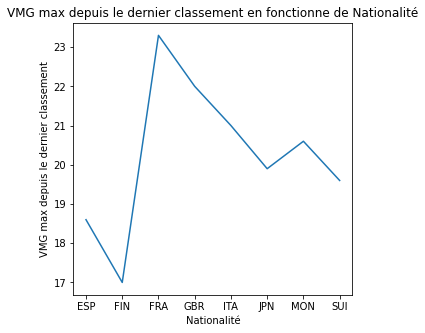

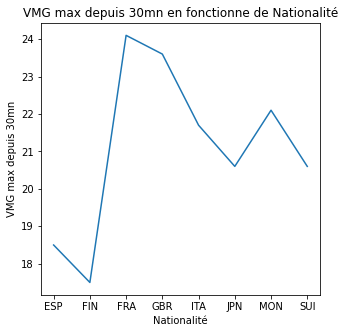

In [28]:
fig1, ax1 = plt.subplots(figsize=(5,5))
fig2, ax2 = plt.subplots(figsize=(5,5))
fig3, ax3 = plt.subplots(figsize=(5,5))
ax1.plot(dt4.index,dt4['VMG max depuis 24 heures']);
ax2.plot(dt4.index,dt4['VMG max depuis le dernier classement'] );
ax3.plot(dt4.index,dt4['VMG max depuis 30mn'] );
ax1.set(title='VMG max depuis 24 heures en fonctionne de Nationalité',
      xlabel='Nationalité',
      ylabel ='VMG max depuis 24 heures');
ax2.set(title='VMG max depuis le dernier classement en fonctionne de Nationalité',
      xlabel='Nationalité',
      ylabel ='VMG max depuis le dernier classement');
ax3.set(title='VMG max depuis 30mn en fonctionne de Nationalité',
      xlabel='Nationalité',
      ylabel ='VMG max depuis 30mn');



**Remarque :** les français ont les vitesses les plus grandes (maximales).

**Conclusion :** : l'étude montre que le groupby nationalité peut nous donner une étude globale sur les vitesses, les rangs et les distances que les voiles ont parcouru par nationalité. Par contre cette étude peut manquer de précision surtouts sur les moyennes de vitesse et de rang, ainsi les valeurs maxi et mini vu qu'on n'a pas un équilibre entre les nationalités 75% FRA et 3-6% pour les autres chacuns. de ce fait on va analyser les données par skipper. 

### 5 - Quelques visualisations et Analyse des données par Skipper:

In [29]:
dt4 = df.groupby('Skipper').agg({'Rang': ['mean', 'count','max','min'],
                              'Voile':'count',
                            'VMG(kts) depuis 30mn': 'max',
                            'VMG(kts) depuis 24 heures': 'max',
                            'VMG(kts) depuis le dernier classement': 'max',
                            'Distance(nm) depuis 30 mn': 'max',
                            'Distance(nm) depuis 24 heures': 'max',
                            'Distance(nm) depuis le dernier classement': 'max'
                              })
dt4.columns= ['Rang moyenne','Nombre de Rang','Max Rang','Min Rang','Nombre de voiles','VMG max depuis 30mn','VMG max depuis 24 heures','VMG max depuis le dernier classement','Distance(nm) max depuis 30mn','Distance(nm) max depuis 24 heures','Distance(nm) max depuis le dernier classement']
dt4.head()

,Rang moyenne,Nombre de Rang,Max Rang,Min Rang,Nombre de voiles,VMG max depuis 30mn,VMG max depuis 24 heures,VMG max depuis le dernier classement,Distance(nm) max depuis 30mn,Distance(nm) max depuis 24 heures,Distance(nm) max depuis le dernier classement
Skipper,,,,,,,,,,,
Alan Roura,16.340249,482,28,14,482,20.6,17.8,19.6,10.3,446.5,2789.2
Alex Thomson,7.461538,156,19,1,156,23.6,20.6,22.0,26.3,501.8,2788.7
Alexia Barrier,25.139004,482,32,21,482,16.4,14.6,16.3,8.7,359.0,2789.4
Ari Huusela,26.390041,482,32,22,482,17.5,14.5,17.0,9.0,351.1,2789.1
Armel Tripon,16.350622,482,32,3,482,24.1,20.7,22.4,12.1,498.2,2788.9


**voyons la liste des skippers qui ont été classés premier au minimuim une seule fois :**

In [30]:
dt4.loc[(dt4['Min Rang']== 1) & (dt4['Nombre de Rang'] == 482) , ['Min Rang']]

,Min Rang
Skipper,
Benjamin Dutreux,1
Damien Seguin,1
Jean Le Cam,1
Jérémie Beyou,1
Louis Burton,1
Maxime Sorel,1
Thomas Ruyant,1
Yannick Bestaven,1


**Visulaisation des skippers en fonction de classement moyenne (qui ont 482 classement) :**

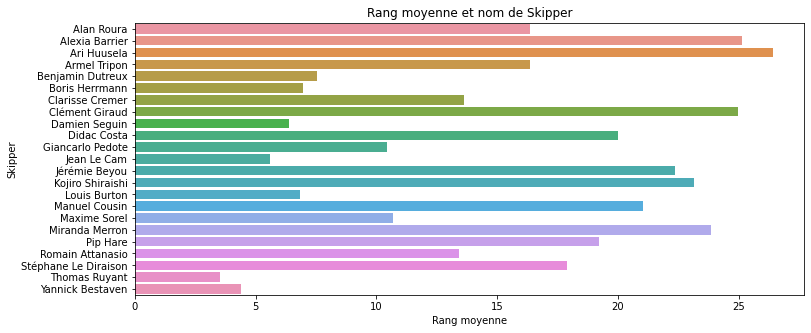

In [31]:
Dtt = dt4.loc[dt4['Nombre de Rang'] == 482 , ['Rang moyenne']]
import seaborn as sns
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.barplot(data = Dtt, x=Dtt['Rang moyenne'] ,y = Dtt.index,linewidth=1);
ax.set_title('Rang moyenne et nom de Skipper');

**Les skippers qui ont parcouru plus de distance depuis 24 heures: **

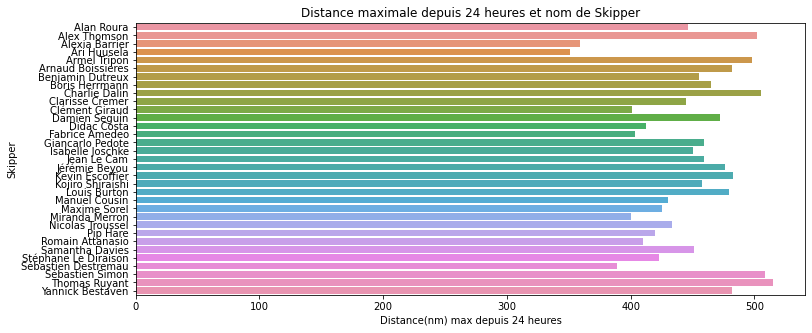

In [32]:
fig1, ax1 = plt.subplots(figsize=(12,5))
ax1 = sns.barplot(data = dt4, x=dt4['Distance(nm) max depuis 24 heures'],y = dt4.index,linewidth=1);
ax1.set_title('Distance maximale depuis 24 heures et nom de Skipper');

**Les skippers qui ont parcoru plus de distance totale depuis le début :** 

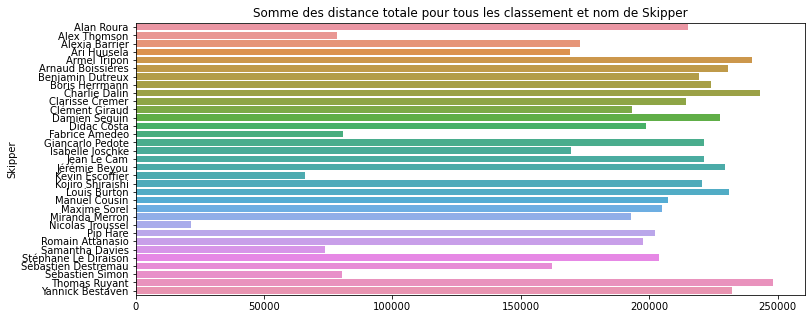

In [33]:
fig1, ax1 = plt.subplots(figsize=(12,5))
ax1 = sns.barplot(data = dt4, x=dt4['Distance(nm) max depuis 24 heures']*dt4['Nombre de Rang'],y = dt4.index,linewidth=1);
ax1.set_title('Somme des distance totale pour tous les classement et nom de Skipper');

**Remarque:** il ya des skippers qui n'ont pas parcouru de distance suffissante comme Nicolas Troussel, cela nous raméne à faire une analyse et recherche sur les skippers qui ont quitté le race (dans notre Dataset).

**Liste des skippers qui ont abondonné :**

In [34]:
selection = dt4.loc[dt4['Nombre de Rang']<482]
tab = selection.pivot_table(values='Nombre de Rang',
                      index='Skipper',
                      aggfunc='max')
tab

,Nombre de Rang
Skipper,
Alex Thomson,156
Arnaud Boissieres,479
Charlie Dalin,481
Fabrice Amedeo,200
Isabelle Joschke,376
Kevin Escoffier,137
Nicolas Troussel,50
Samantha Davies,163
Sébastien Destremau,417


**La liste des skippers qui n'ont pas abondonné (sur la totalité du jeux des données utilisée) :**

In [35]:
selection2 = dt4.loc[dt4['Nombre de Rang']==482]
tab2 = selection2.pivot_table(values='Nombre de Rang',
                      index='Skipper',
                      aggfunc='max')
tab2


,Nombre de Rang
Skipper,
Alan Roura,482
Alexia Barrier,482
Ari Huusela,482
Armel Tripon,482
Benjamin Dutreux,482
Boris Herrmann,482
Clarisse Cremer,482
Clément Giraud,482
Damien Seguin,482


## III - Analyses de séries temporelles :

In [36]:
# on va selectionner les données nécessaires afin d'analyser l'avancement de skipper en fonction de temps
selection_time_series = df[['Rang', 'Temps', 'Skipper']]
dt_time = (pd.DataFrame(selection_time_series)).sort_values('Temps')
dt_time.head()


,Rang,Temps,Skipper
27,28,2020-11-08 15:26:00,Isabelle Joschke
19,20,2020-11-08 15:27:00,Nicolas Troussel
29,30,2020-11-08 15:28:00,Miranda Merron
25,26,2020-11-08 15:28:00,Armel Tripon
13,14,2020-11-08 15:28:00,Damien Seguin


In [37]:
import numpy as np
def plot_skipper_time(skippers):
    plt.subplots(figsize=(16, 9))
    plt.title('Evolution du rang de Skipper en fontion de temps')
    for skipper in skippers:
        rang = dt_time['Rang'].loc[dt_time['Skipper'] == skipper]
        dates = dt_time['Temps'].loc[dt_time['Skipper'] == skipper]
        plt.plot(dates, rang, label =skipper)

    plt.xlabel('Temps') 
    plt.ylabel("Rang")
    plt.legend(loc="best")


### 1 - Visualiser la liste des skippers qui ont classé 1er minimuim une seule fois :

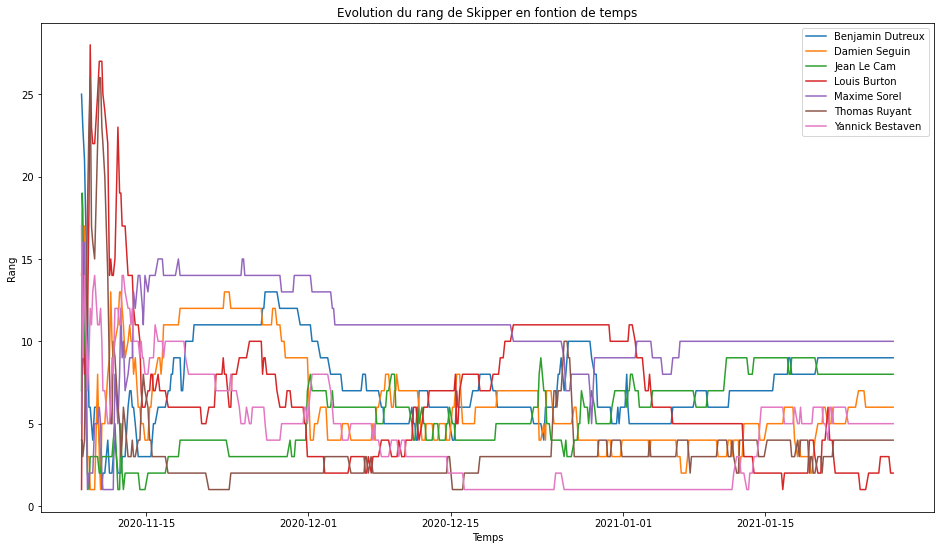

In [38]:
# On va utiliser la liste deduite lors de l'analyse des skippers qui'ont classé premier au minimuim une fois
Skippers_1_at_least_once =['Benjamin Dutreux','Damien Seguin','Jean Le Cam','Louis Burton','Maxime Sorel','Thomas Ruyant','Yannick Bestaven']
plot_skipper_time(Skippers_1_at_least_once)



### 2 - Visualiser la liste des skippers qui ont abondoné :

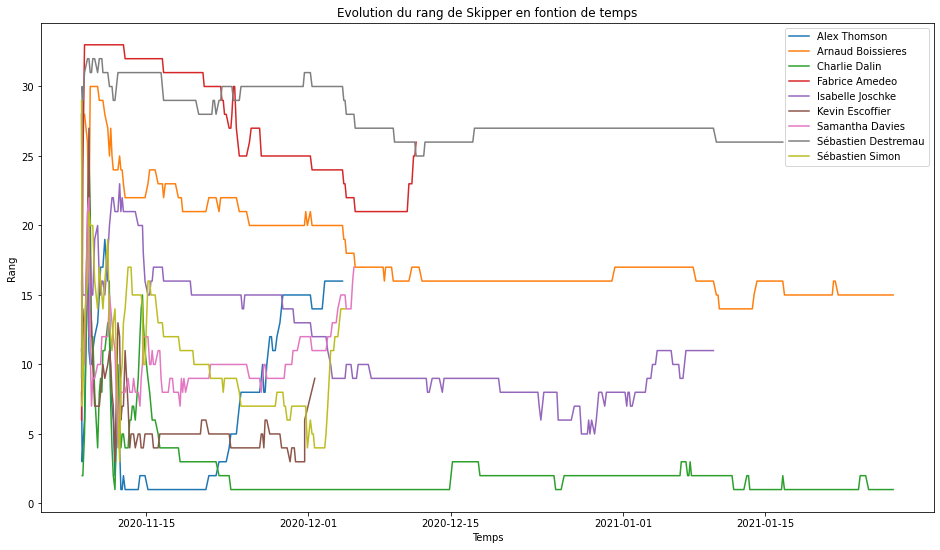

In [39]:
# On va utiliser la liste deduite lors de l'analyse des skippers qui'ont abondonné
Skippers_abondonne =['Alex Thomson','Arnaud Boissieres','Charlie Dalin','Fabrice Amedeo','Isabelle Joschke','Kevin Escoffier','Samantha Davies','Sébastien Destremau','Sébastien Simon']
plot_skipper_time(Skippers_abondonne)

**Remarque**
- On voit bien que les lignes des tracé des skippers en fonction de temps ne se terminent pas vers la fin, il ya des skippers qui ont abondonné avant decembre 2020 et d'autre début janvier etc...

## IV - Machine Learning :

- clustering non foils VS rang moyen 
- clustering VMG moyenne depuis 24 heures vs moyenne de rang 
- clustering sur VMG depuis 24 heures vs rang
- Regression linaire VMG en fonction de rang moyenne (voir partie II.1)

### 1. Clustering sur les valeurs moyennes de VMG depuis 24 heures, présence de foils et la moyenne de rang :

In [40]:
dt_foils =df1.groupby('Crew').agg({'Rang': ['mean', 'count'],
                            'VMG(kts) depuis 24 heures': 'mean',
                            'Nombre de dérives':'max'})
dt_foils.columns= ['Rang moyenne','Nombre de Rang','VMG Moyenne depuis 24 heures','Présence de foils']
dt_foils['Présence de foils'] = dt_foils['Présence de foils'].str.replace('foils','OUI').str.replace('foiler','OUI').str.replace('2 asymétriques','OUI').str.replace('2','OUI')
dt_foils['Présence de foils'].fillna('NON',inplace = True)
# prendre les top 10 afin de savoir les vrai impactes sur la présence ou non présence de foils sur le classement.
dt_foils= dt_foils.loc[dt_foils['Nombre de Rang']== 482]
dt_foils = dt_foils.drop('Nombre de Rang',axis = 1 )
dt_foils.head()
# transformer les variables de dt_foils_rang['Présence de foils'] OUI/ non en 0 1 avec OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
var = enc.fit_transform(dt_foils[['Présence de foils']])
dt_foils[['NO foils','OUI foils']] = pd.DataFrame(var.toarray())
dt_foils[['NO foils','OUI foils']] = var.toarray()
dt_foils = dt_foils.drop('Présence de foils',axis = 1 ).drop('NO foils',axis = 1)
dt_foils.head()

,Rang moyenne,VMG Moyenne depuis 24 heures,OUI foils
Crew,,,
Banque Populaire X,13.636929,11.770539,1.0
Bureau Vallée 2,6.819502,12.571577,0.0
Campagne De France,23.852697,10.111618,1.0
Charal,22.369295,11.132365,1.0
Compagnie Du Lit - Jiliti,24.946058,10.113071,0.0


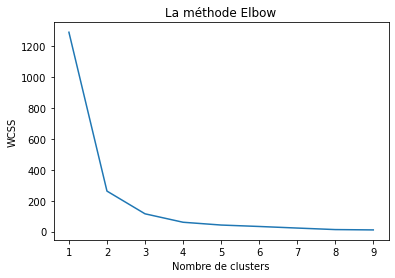

In [41]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(dt_foils)
    wcss.append(kmeans.inertia_)
wcss
plt.plot(range(1, 10), wcss)
plt.title('La méthode Elbow')
plt.xlabel('Nombre de clusters')
plt.ylabel('WCSS')
plt.show()


In [42]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 0)
kmeans.fit(dt_foils)
kmeans.labels_
kmeans.cluster_centers_
cluster1= dt_foils[kmeans.labels_ == 1]
cluster0= dt_foils[kmeans.labels_ == 0]


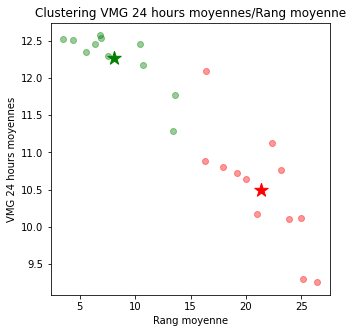

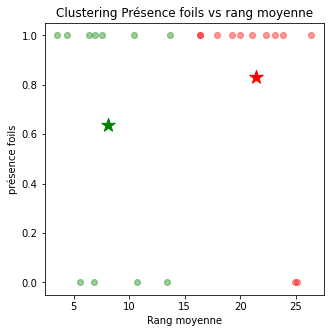

In [43]:
fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.scatter(cluster1['Rang moyenne'], cluster1['VMG Moyenne depuis 24 heures'], c='green',alpha = 0.4)
ax1.scatter(cluster0['Rang moyenne'], cluster0['VMG Moyenne depuis 24 heures'], c='red',alpha = 0.4)
ax1.scatter(kmeans.cluster_centers_[0][0],kmeans.cluster_centers_[0][1], marker = '*',c = 'r',s = 200)
ax1.scatter(kmeans.cluster_centers_[1][0],kmeans.cluster_centers_[1][1], marker = '*',c = 'g',s = 200)
ax1.set(title='Clustering VMG 24 hours moyennes/Rang moyenne',
       xlabel='Rang moyenne',
      ylabel ='VMG 24 hours moyennes');
fig2, ax2 = plt.subplots(figsize=(5,5))
ax2.scatter(cluster1['Rang moyenne'], cluster1['OUI foils'], c='green',alpha = 0.4)
ax2.scatter(cluster0['Rang moyenne'], cluster0['OUI foils'], c='red',alpha = 0.4)
ax2.scatter(kmeans.cluster_centers_[0][0],kmeans.cluster_centers_[0][2], marker = '*',c = 'r',s = 200)
ax2.scatter(kmeans.cluster_centers_[1][0],kmeans.cluster_centers_[1][2], marker = '*',c = 'g',s = 200)
ax2.set(title='Clustering Présence foils vs rang moyenne',
       xlabel='Rang moyenne',
       ylabel ='présence foils');

### 2 - Clustering sur toutes les lignes des données de vitesse, VMG et distance (sans faire la moyenne des valeurs) :

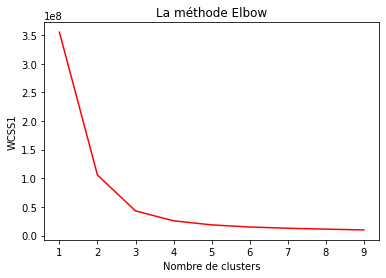

In [44]:
df_clustering = df1[['Rang','VMG(kts) depuis 24 heures','VMG(kts) depuis 30mn','VMG(kts) depuis le dernier classement','Distance(nm) depuis 24 heures','Distance(nm) depuis 30 mn','Distance(nm) depuis le dernier classement','Vitesse(kts) depuis le dernier classement','Vitesse(kts) depuis 30mn','Vitesse(kts) depuis 24 heures']]
wcss1 = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(df_clustering)
    wcss1.append(kmeans.inertia_)
wcss1
plt.plot(range(1, 10), wcss1,'r')
plt.title('La méthode Elbow')
plt.xlabel('Nombre de clusters')
plt.ylabel('WCSS1')
plt.show()

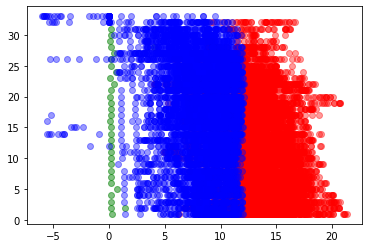

In [45]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
kmeans.fit(df_clustering)
kmeans.labels_
kmeans.cluster_centers_
cluster1= df_clustering[kmeans.labels_ == 1]
cluster0= df_clustering[kmeans.labels_ == 0]
cluster2= df_clustering[kmeans.labels_ == 2]

plt.scatter(cluster1['VMG(kts) depuis 24 heures'], cluster1['Rang'], c='green',alpha = 0.5)
plt.scatter(cluster0['VMG(kts) depuis 24 heures'], cluster0['Rang'], c='red',alpha = 0.4)
plt.scatter(cluster2['VMG(kts) depuis 24 heures'], cluster2['Rang'], c='b',alpha = 0.4)

plt.show()


**Définiton de VMG (trouvée sur internet) :**
- Le VMG (Velocity Made Good en anglais que l’on peut traduire littéralement par vitesse utile) est le gain dans le lit du vent (mesuré en noeuds), autrement dit la projection de la vitesse surface (vitesse sur l’eau mesurée par le loch-speedo) sur l’axe du vent réel (ou vent vrai), calculée par la centrale de navigation.

- Qu’on soit au près ou au portant, sur la panne ou presque, le VMG équivaut ainsi au meilleur compromis cap/vitesse. Si on serre trop le vent apparent, la composante angulaire est favorable mais la vitesse chute. Inversement, en abattant, la vitesse surface augmente mais l’angle de vent s’accroît et le VMG s’effondre.

**Remarque** : 
- Le cluster nous montre qu'il ya des VMG négative avec des rangs importants, des vmg nulles et des vmg positives, tous ça montrent qu'il ya des skippers qui ont profité du vent pour augmenter leurs vitesses en contrepartir ils ont augmenté la distance parcouru et ceux qui ont décider d'aller direct contre le vent pour gagner en distance et en temps.
- Autres interprétation, au moment de prise le range, le skipper était déja dans une situation contre le vent(VMG négative ou nulle). 


### 3 - Simple regression lineaire entre les valeurs moyennes de rang et VMG groupé par Crew : 

Score R² est : 0.71676105755652


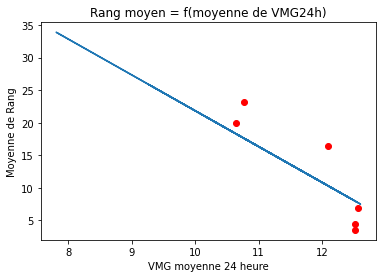

In [46]:
X_24h # la vitesse 24 h moyenne par crew déja extraite lors de la partie II.1
y # la moyenne de rang par crew extraite de la partie II.1
from sklearn.model_selection import train_test_split
X_24h_train,X_24h_test,y_train,y_test = train_test_split(X_24h,y,test_size = 0.2)
regressor = LinearRegression()
regressor.fit(X_24h_train,y_train)
print(f'Score R² est : {regressor.score(X_24h_test,y_test)}')
#  prédict quelques valeurs :

plt.scatter(X_24h_test, y_test, color = 'red',label = 'valeur de test')
plt.plot(X_24h_train, regressor.predict(X_24h_train), label = 'droite de regression lineaire')
plt.xlabel("VMG moyenne 24 heure")
plt.ylabel("Moyenne de Rang")
plt.title("Rang moyen = f(moyenne de VMG24h)")
plt.show()

- On remarque bien la relation linaire enter VMG et Rang, pour plus de détails et de courbes voir la partie II.1



## V. Conclustion: 

- Ce set de data est trés riche, on peut avoir plusieurs angles d'analyse des données et d'exploitation. dans cette analyse on a pris 5 ou 6 angles parmi les plusieurs possibles. 
- Le cleaning et le traitement des données ont pris presque 60% du temps, l'autre 40% du temps est pour analyse et ML
- On a utilisé plusieurs techniques acquises lors de cours de kit data. le code en question n'est pas avancé et simple. on a essayé de décomposer chaque commande et comprendre.
- Le projet en question est intéressant, malgrés les difficlutés sur quelques aspects, il nous permet de comprendre les notions des cours de cleaning data, index, selection, aggregation et groupby ainsi la partie affichage.